<a href="https://colab.research.google.com/github/True-Duku/Kakaoku/blob/main/Exam_AnalyseDeDonnees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Initialisation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
# Importation du data set, affichage des premières lignes et la somme des valeures manquantes
data = pd.read_csv('kidney_disease.csv',index_col=0)
print(data.head()),print(data.isna().sum())

     age    bp     sg   al   su     rbc        pc         pcc          ba  \
id                                                                          
0   48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1    7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

      bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
id         ...                                                               
0   121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            ckd  
1     NaN  ...   38  6000  NaN   no   no  no  good   no   no            ckd  
2   423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            ckd  
3   117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes          

(None, None)

In [8]:
# Affichage des variables et de leurs types, affichage de statistiques rapides
print(data.info()),print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    object 


(None, None)

In [10]:
# Montre toutes les variables unique dans le jeu de données
for i in data:
    print(data[i].unique())

[48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
[ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
[1.02  1.01  1.005 1.015   nan 1.025]
[ 1.  4.  2.  3.  0. nan  5.]
[ 0.  3.  4.  1. nan  2.  5.]
[nan 'normal' 'abnormal']
['normal' 'abnormal' nan]
['notpresent' 'present' nan]
['notpresent' 'present' nan]
[121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  89. 297. 233. 294. 323. 125. 

In [12]:
# Sélectionne les variables numériques et quatégorielles, cat et num
cat_data = data.select_dtypes(include='object').columns
num_df = data.select_dtypes(include='number').columns

In [13]:
# Remplacement des valeurs numériues manquantes par la moyenne des valeurs
data.loc[:,num_df] = data.loc[:,num_df].fillna(data.loc[:,num_df].mean())

In [15]:
# Affichage du dataset
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.000000,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,148.036517,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49,6600,5.4,no,no,no,good,no,no,notckd


In [18]:
# Affichage des colonnes des variables catégorielles
cat_data

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [19]:
# Affichage des variables catégorielles
aff_mod = data.select_dtypes(include='object')
for i in aff_mod:
    print(aff_mod[i].unique())

[nan 'normal' 'abnormal']
['normal' 'abnormal' nan]
['notpresent' 'present' nan]
['notpresent' 'present' nan]
['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5400' '10800'
 '9900' '5200'

In [20]:
# Remplacement des variables catégorielles binaire par les nombres 1 et -1
data.select_dtypes(include='object').replace(['yes','no','good','poor','normal','abnormal','present','notpresent'],[1,-1,1,-1,1,-1,1,-1],inplace=True)

In [21]:
# Vérification de l'opération
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.000000,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,148.036517,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [22]:
# Remplacement des variables catégorielles par le mode
data.loc[:,cat_data]=data.loc[:,cat_data].fillna(data.loc[:,cat_data].mode())

In [23]:
# Vérifcation
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,148.036517,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49,6600,5.4,no,no,no,good,no,no,notckd


In [24]:
# Somme des valeurs manquantes
data.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               151
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [25]:
# Remplacement des valeurs manquantes de la variable RC par le mode
data['rc'] = data['rc'].fillna(data['rc'].mode())

In [26]:
# Definition de la variable cible Hemo
y = data['hemo']

In [27]:
# Supression des variables inutiles
data = data.drop(['rbc','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane','classification','hemo'],axis=1)

In [28]:
# Vérification
data

,age,bp,sg,al,su,bgr,bu,sc,sod,pot
id,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244
...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000


In [62]:
# Normalisation des données
scal = StandardScaler()
norm = scal.fit_transform(data)


In [65]:
# Application du modèle
model = PCA()
coord_acp = model.fit(norm)

In [72]:
# Stockage du resultat dans une variables u

#feature = list(coord_acp.feature_names_in_)
explained = list(coord_acp.explained_variance_)
u = pd.DataFrame({'Explained':explained})

In [73]:
# Affichage de la variable cible
y

id
0      15.4
1      11.3
2       9.6
3      11.2
4      11.6
       ... 
395    15.7
396    16.5
397    15.8
398    14.2
399    15.8
Name: hemo, Length: 400, dtype: float64

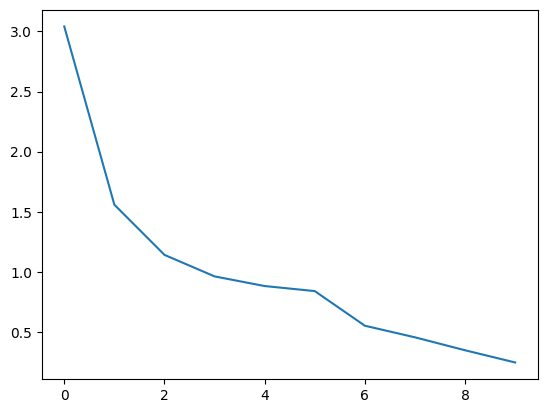

In [74]:
# Graphique de la variance expliqué en fonction des facteur
plt.plot(range(0,10),coord_acp.explained_variance_)

#plt.figure(figsize=(10,10)
#plt.plot(range(0,50),coord_acp.explained_variance_)


In [75]:
# Méthode du coude
print(coord_acp.n_components_)

10


In [76]:
# Affichage de component
component = list(coord_acp.components_)
pd.DataFrame({'Component':component})

,Component
0,"[0.213875825768097, 0.21490943364328807, -0.35..."
1,"[-0.16074384539153608, -0.09251333459827357, 0..."
2,"[0.04245338745683614, 0.06751787527196856, 0.2..."
3,"[0.643436540208531, 0.5934181199662788, 0.2057..."
4,"[0.2597129750494174, -0.5986998396641793, 0.37..."
5,"[-0.6465601964295651, 0.4676866422713038, 0.29..."
6,"[0.023594215299412694, 0.03260917964474328, 0...."
7,"[0.15693346233771813, 0.0850489478210704, 0.22..."
8,"[-0.040592598080563334, 0.05179823769583616, -..."
9,"[0.016798848376718727, 0.01998641396512822, 0...."


In [77]:
print(coord_acp.components_[2])

[ 0.04245339  0.06751788  0.20500381 -0.10975207  0.08930682 -0.11503488
  0.27914032 -0.02110112  0.44504979  0.80120181]


In [94]:
# Représentation des données sur les 2 premières composantes de l'ACP
coco = coord_acp.components_
acp_data = pd.DataFrame({'Component 0':coco[:,0],'Component 1': coco[:,1]})

acp_data

,Component 0,Component 1
0,0.213876,0.214909
1,-0.160744,-0.092513
2,0.042453,0.067518
3,0.643437,0.593418
4,0.259713,-0.598700
5,-0.646560,0.467687
6,0.023594,0.032609
7,0.156933,0.085049
8,-0.040593,0.051798
9,0.016799,0.019986


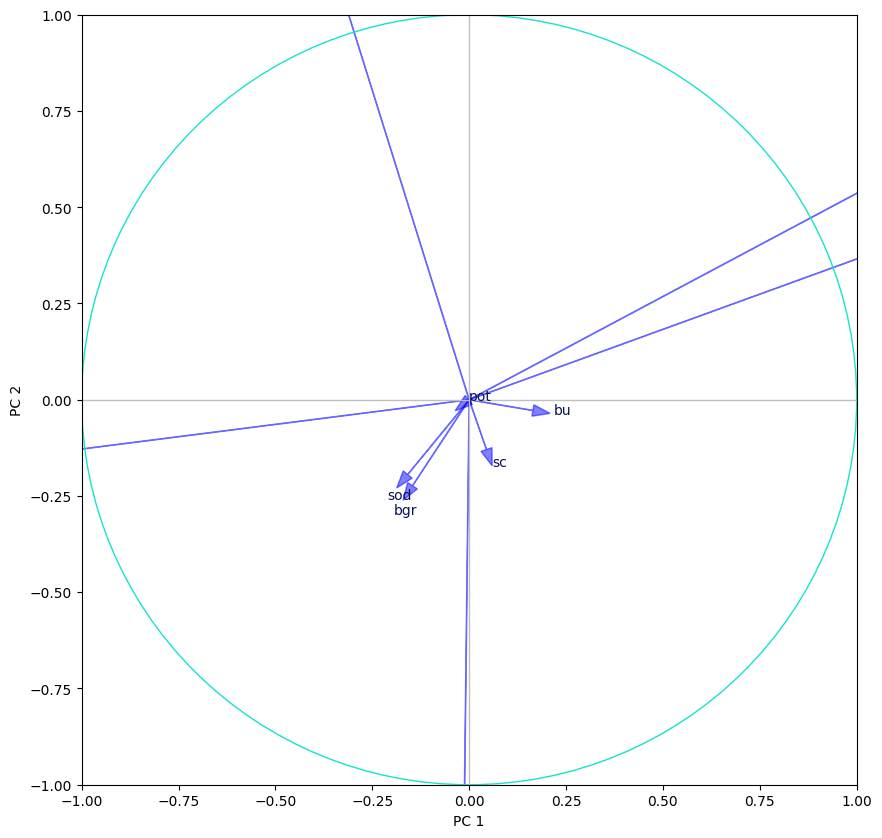

In [45]:
# Cercle de corrélation du dataframe
size = len(data.columns)
racine_valeurs_propres = np.sqrt(model.explained_variance_)
corvar = np.zeros((size,size))
for k in range(size):
    corvar[:,k] = model.components_[:,k] * racine_valeurs_propres[k]

#Délimitation de la figure
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#Affichage des variables
for j in range(size):
    plt.annotate(data.columns[j],(corvar[j,0]*0.8,corvar[j,1]*0.8),color='#091158')
    plt.arrow(0,0,corvar[j,0]*0.6,corvar[j,1]*0.6, alpha=0.5, head_width=0.03,color='b' )

#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#Cercle et légendes
cercle = plt.Circle((0,0),1,color='#16E4CA',fill=False)
axes.add_artist(cercle)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

<Axes: xlabel='Component 0', ylabel='Component 1'>

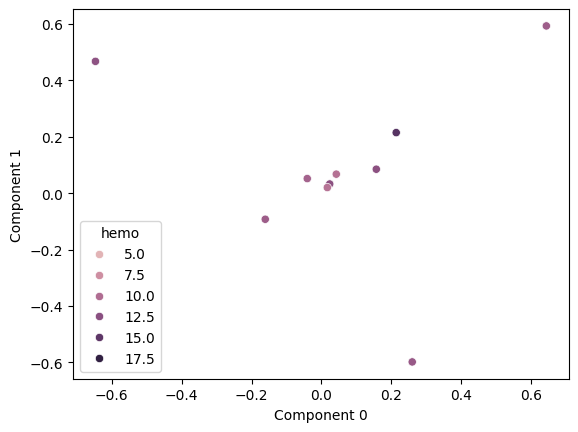

In [98]:
sns.scatterplot(x='Component 0', y = 'Component 1', hue=y,data=acp_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='A', ylabel='B'>

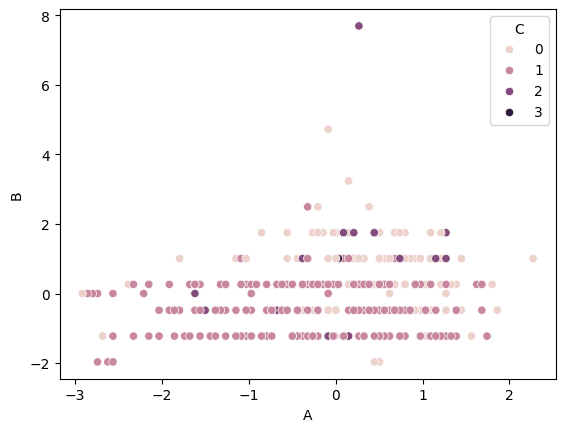

In [102]:
# Instance de classe Kmean avec un nombre de cluster définis
# Stockage des variable predite et affichage
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4)
km.fit(norm)
y_pred = km.predict(norm)

df_kmean = pd.DataFrame({'A':norm[:,0],'B':norm[:,1],'C':y_pred})

sns.scatterplot(x='A',y='B',hue='C',data=df_kmean)

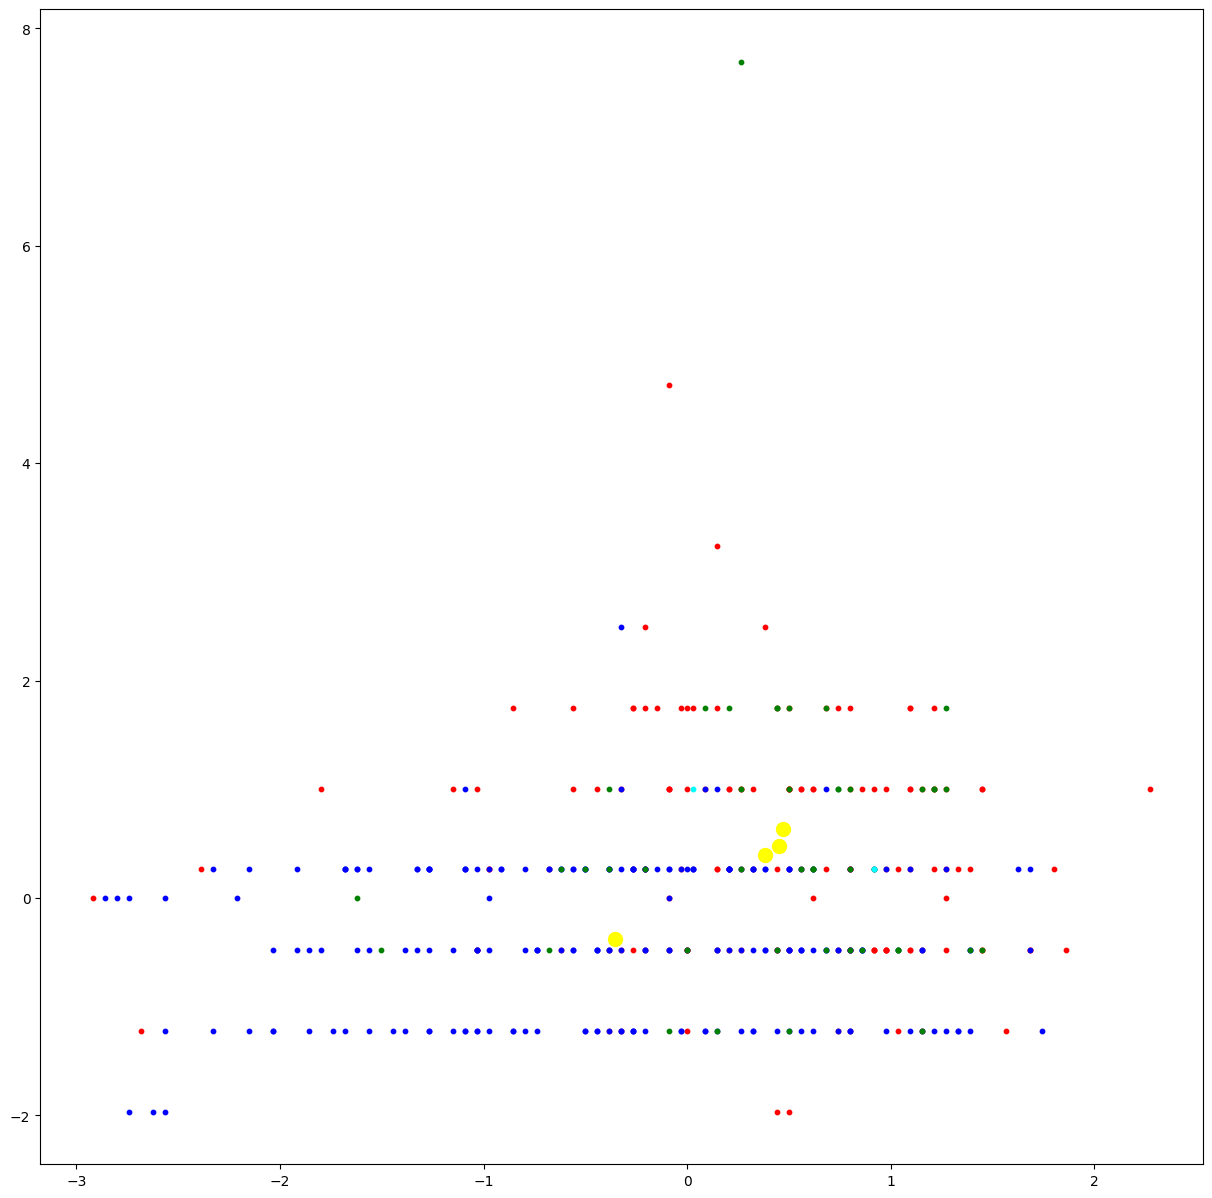

In [103]:
# Afficher le nombre de patients appartenant à chacun des groupes obtenus par le K-Means.

plt.figure(figsize=(15,15))

plt.scatter(df_kmean[y_pred==0].iloc[:,0],df_kmean[y_pred==0].iloc[:,1],s=10,c='red',label='Cluster 1')
plt.scatter(df_kmean[y_pred==1].iloc[:,0],df_kmean[y_pred==1].iloc[:,1],s=10,c='blue',label='Cluster 2')
plt.scatter(df_kmean[y_pred==2].iloc[:,0],df_kmean[y_pred==2].iloc[:,1],s=10,c='green',label='Cluster 3')
plt.scatter(df_kmean[y_pred==3].iloc[:,0],df_kmean[y_pred==3].iloc[:,1],s=10,c='cyan',label='Cluster 4')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='yellow',label='Centroid')

<Axes: xlabel='Axe 1', ylabel='Axe 2'>

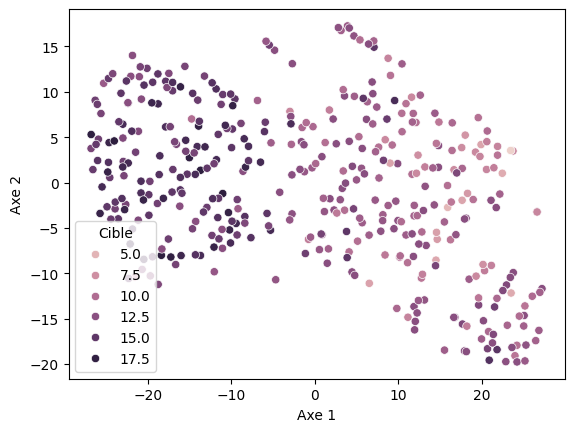

In [105]:
# Création d'une instance de classe TSNE
# Stockage dans une variable et affichage
from sklearn.manifold import TSNE

tsne = TSNE()
norm_tsne = tsne.fit_transform(norm)
coord_tsne = pd.DataFrame({'Axe 1':norm_tsne[:,0],'Axe 2':norm_tsne[:,1],'Cible':y})

sns.scatterplot(x='Axe 1',y='Axe 2',hue='Cible',data= coord_tsne)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Component 1', ylabel='Component 2'>

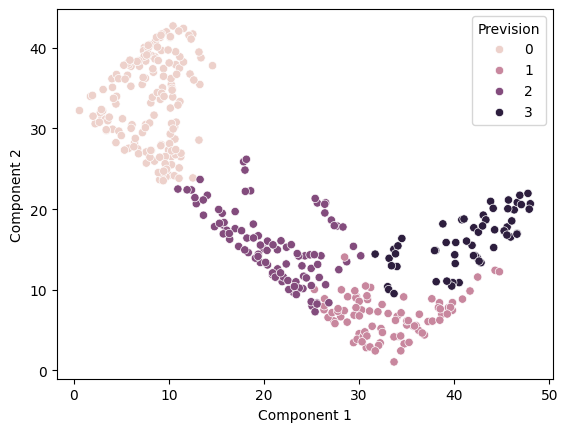

In [107]:
# Créer une instance de la classe KMeans avec le nombre de clusters qui vous semble juste.
# Ajuster le modèle au données coord_TSNE.
# Récupérer les predictions réalisées par l'algorithme.
# Stocker dans un nouveau DataFrame

km_tsne = KMeans(n_clusters = 4)
adj_tsne = km_tsne.fit_transform(coord_tsne)
tsne_pred = km_tsne.predict(coord_tsne)

data_tsne = pd.DataFrame({'Component 1':adj_tsne[:,0],'Component 2':adj_tsne[:,1],'Prevision':tsne_pred})

sns.scatterplot(x='Component 1',y='Component 2',hue='Prevision',data=data_tsne)


<Axes: xlabel='Component 1', ylabel='Component 2'>

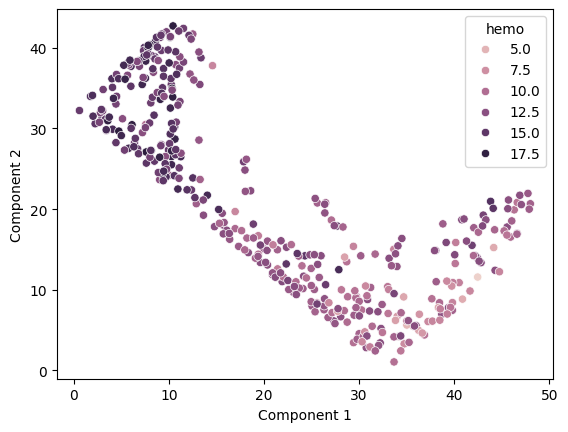

In [108]:
# Afficher le nombre de personnes malades et non malades obtenu par le K-Means.

sns.scatterplot(x='Component 1',y='Component 2',hue=y,data=data_tsne)